<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/generic1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHI-SQUARED ANALYSIS RESULTS:
A_best = 2.04
minchi2 =  0.09
N =  5
good fit range for minchi2 = [ 1.84 , 8.16 ]


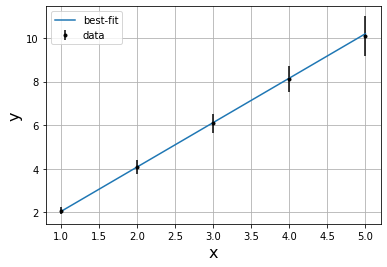

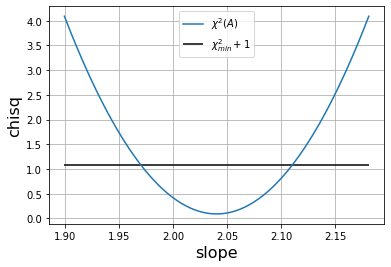

In [ ]:
# 1dchi2.py version 5/11/20
# This script does chi-square curve fitting to a 1-parameter linear model
# y = Ax
# Needed are three arrays:
    # x is an array of mean values for the independent variable
    # y is an array of mean values for the depednent variable
    # y_err is an array of standard errors (i.e., SD/(sqrt of N)) for y
# Note that this script only handles errors on the dependent (y) variable.
# SOFTWARE DEPENDENCIES: Numpy, Matplotlib
# ---------------------------------------------------------------------------
# AUTHORS:  Carey Witkov, witkov.github@gmail.com, and Keith Zengel, zengel@fas.harvard.edu
# COPYRIGHT: This script is copyright (2017-2020) Carey Witkov and Keith Zengel.
# LICENSE:  Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
# https://creativecommons.org/licenses/by-nc/4.0/
# DISCLAIMER: THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

# Measure the mass of each set of coffee filters
ind_var = np.array([1, 2, 3, 4, 5])

# Measure the terminal velocity for each set of filters 5 times and record the values
dep_var1 = np.array([2, 2.1, 2.2, 2, 2.1])
dep_var2 = np.array([4, 4.1, 4.2, 4, 4.1])
dep_var3 = np.array([6, 6.1, 6.2, 6, 6.1])
dep_var4 = np.array([8, 8.2, 8.1, 8.1, 8.2])
dep_var5 = np.array([10, 10.2, 10.1, 10.2, 10])

dep_var = np.array([mean(dep_var1), mean(dep_var2), mean(dep_var3), mean(dep_var4), mean(dep_var5)])
sigma_dep_var=np.array([np.std(dep_var1, ddof=1), np.std(dep_var2, ddof=1), np.std(dep_var3, ddof=1), np.std(dep_var4, ddof=1), np.std(dep_var5, ddof=1)]/np.sqrt(5));

# x,y data arrays and y-error array
x = ind_var
y = dep_var
yerr = 2*dep_var*sigma_dep_var

# calculate sums needed to obtain chi-square
s_yy=sum((y**2)/(yerr**2));
s_xx=sum((x**2)/(yerr**2));
s_xy=sum((y*x)/(yerr**2));

A_best = s_xy/s_xx
sigma_A = 1/sqrt(s_xx)
minchi2 = s_yy - s_xy**2/s_xx

# plot data with errorbars 
plt.figure()
plt.errorbar(x,y,yerr,linestyle='None',fmt='.k', label ="data")
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.plot(x, A_best*x, label="best-fit")

# add legend
plt.legend(loc="upper left")

# create parameter range for slope
xmin = A_best-2*sigma_A
ymin = A_best+2*sigma_A
A = np.linspace(xmin,ymin,200)

# calculate chi-square 
chi2 = s_yy + (A**2)*(s_xx) - 2*A*s_xy 
     
# display chi-square vs. slope
plt.figure()

plt.plot(A,chi2, label='$\chi^{2}(A)$')
plt.xlabel('slope',fontsize=16)
plt.ylabel('chisq',fontsize=16)
plt.grid(True)
plt.hlines(minchi2+1,xmin,ymin, label='$\chi^{2}_{min} + 1$' )

# add legend
plt.legend(loc="upper center")

# display main results
print("CHI-SQUARED ANALYSIS RESULTS:")
A_best_float = "{:.2f}".format(A_best)
minchi2_float = "{:.2f}".format(minchi2)
print("A_best =",A_best_float)
print("minchi2 = ",minchi2_float)
N = len(x)
print("N = ", N)
N_min_float = "{:.2f}".format(N-sqrt(2*N))
N_max_float = "{:.2f}".format(N+sqrt(2*N))
print("good fit range for minchi2 = [",N_min_float, ",",N_max_float,"]")
